In [6]:
curr_dir = f'/user_data/vayzenbe/GitHub_Repos/hemispace' #CHANGE AS NEEEDED CAUSE ITS FOR VLAAAD

import sys
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import itertools
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask, load_mni152_template
import nibabel as nib
import pdb
import os
import hemispace_params as params

In [7]:
data_dir = params.data_dir
results_dir = params.results_dir
fig_dir = params.fig_dir

sub_info = params.sub_info
task_info = params.task_info

suf = params.suf
rois = params.rois
hemis = params.hemis

#load data summary
data_summary = pd.read_csv(f'{results_dir}/hemispace_summary_vals{suf}.csv')

#load subject info
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')

#extract just patients from group
sub_info = sub_info[sub_info['group']=='patient']

#load mni mask
mni = load_mni152_brain_mask()


Text(0.5, 1.0, 'A single plot')

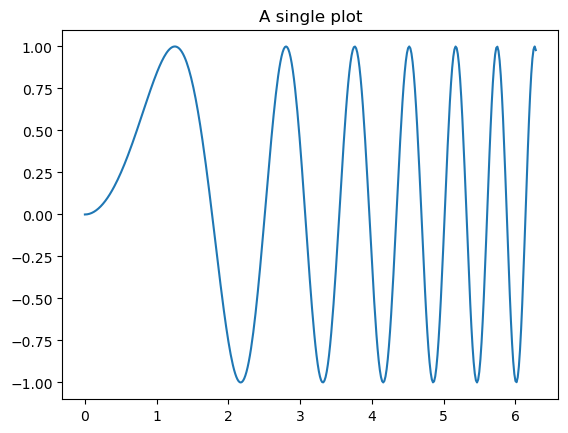

In [19]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

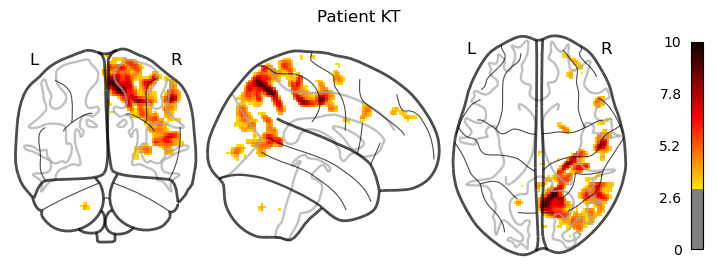

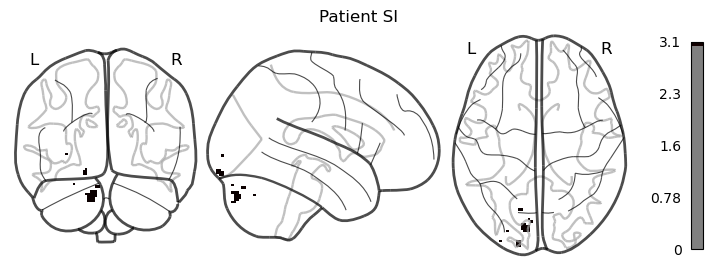

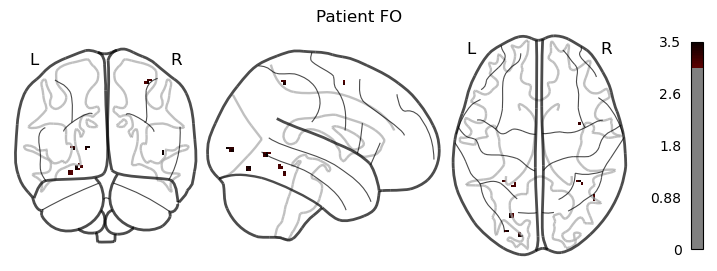

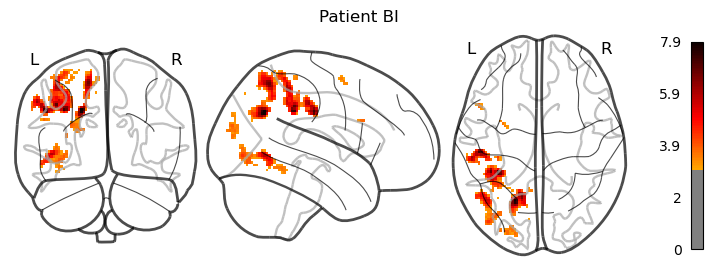

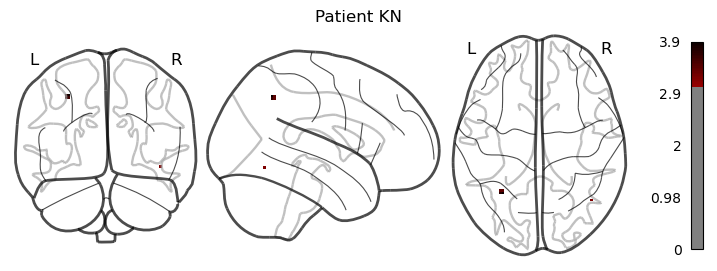

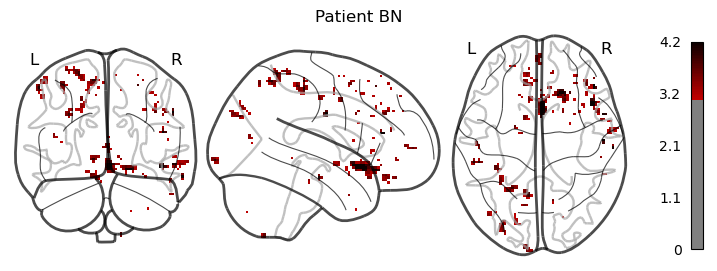

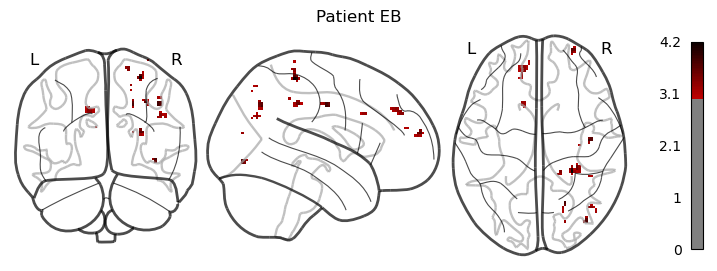

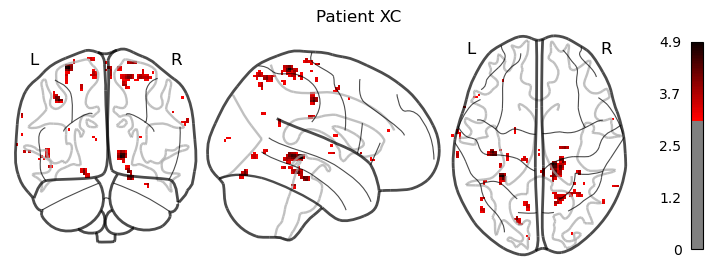

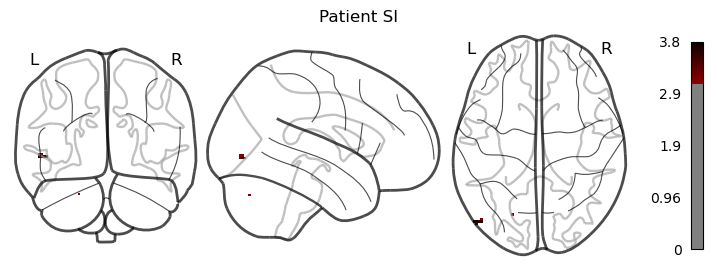

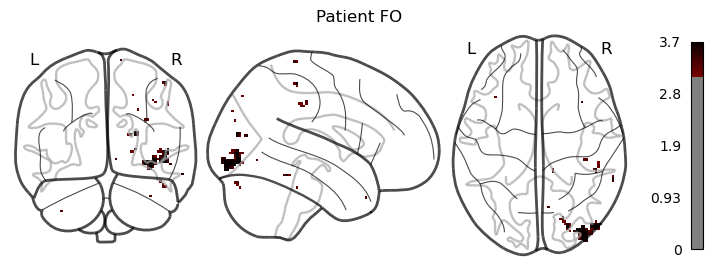

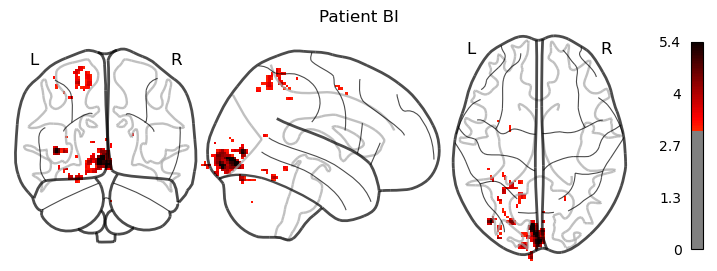

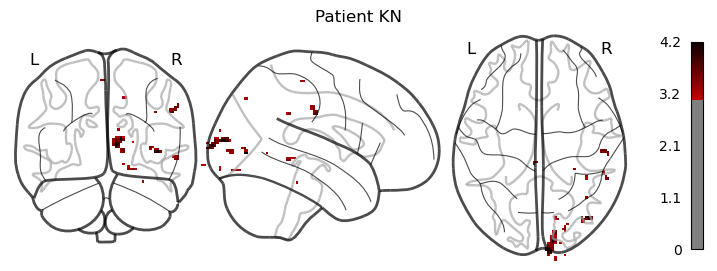

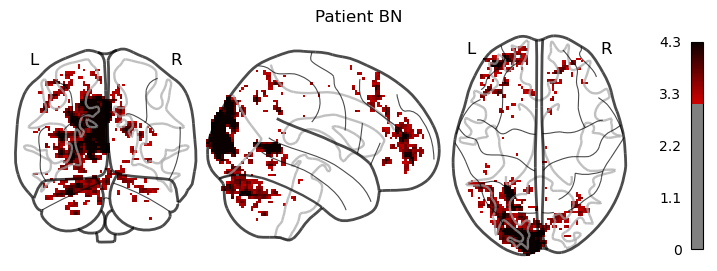

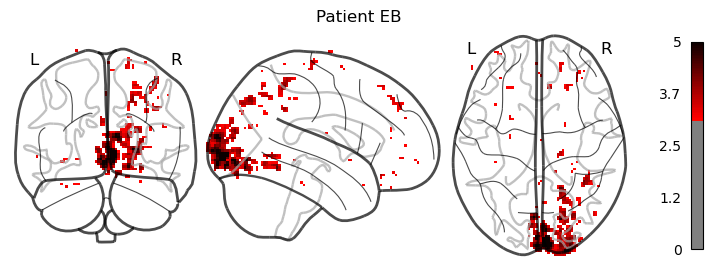

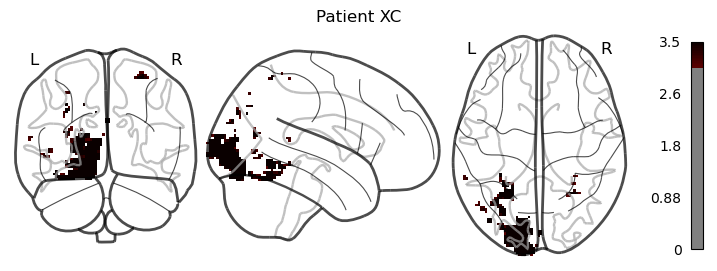

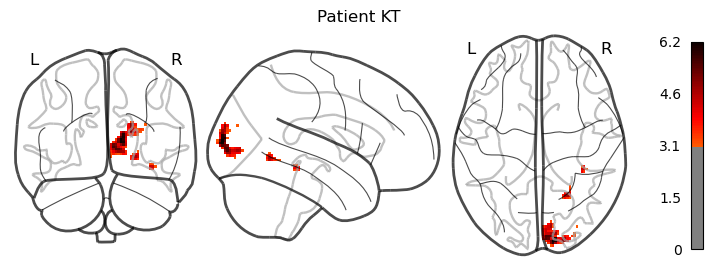

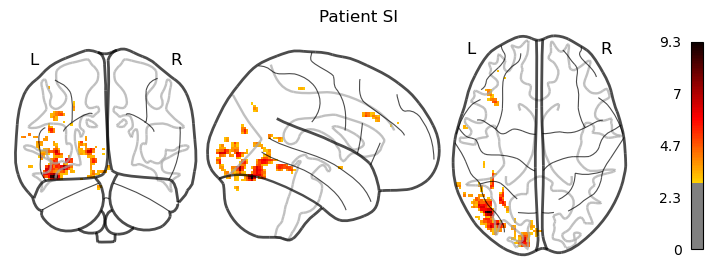

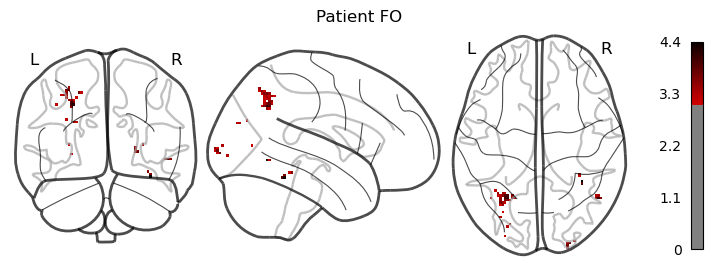

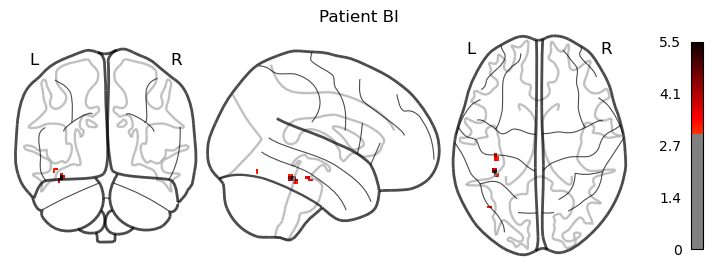

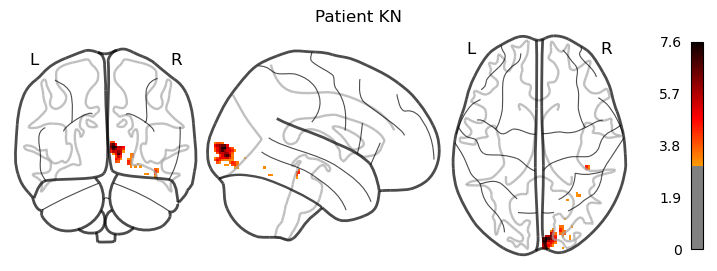

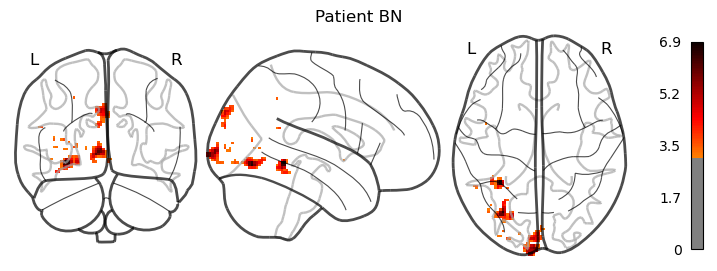

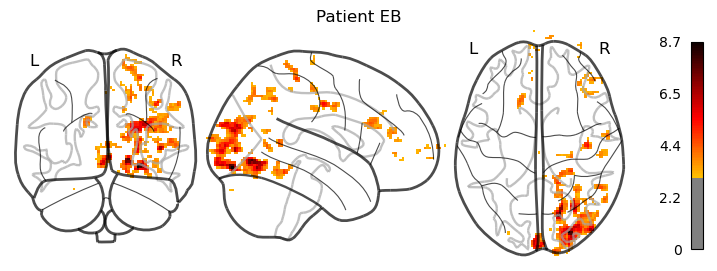

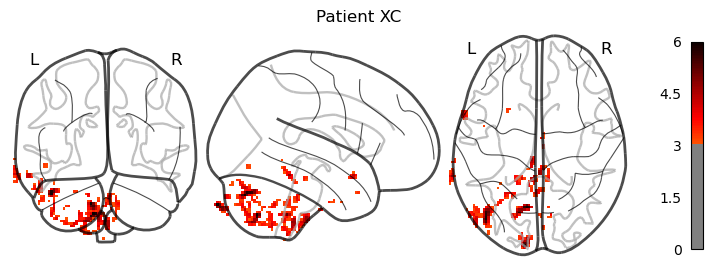

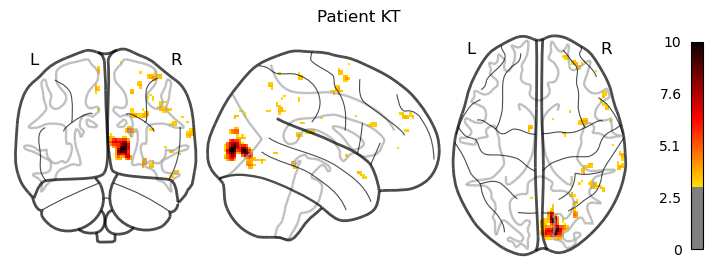

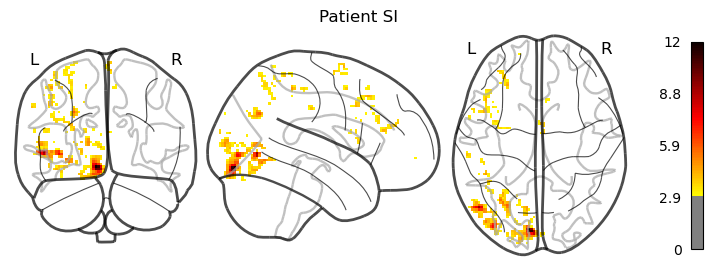

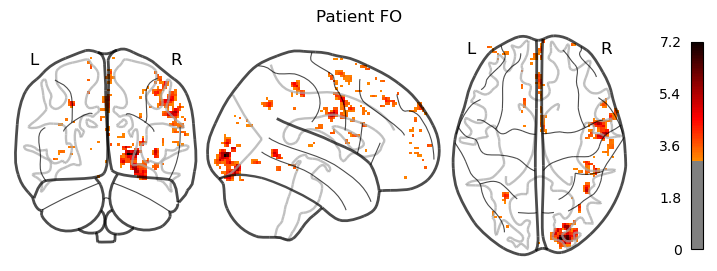

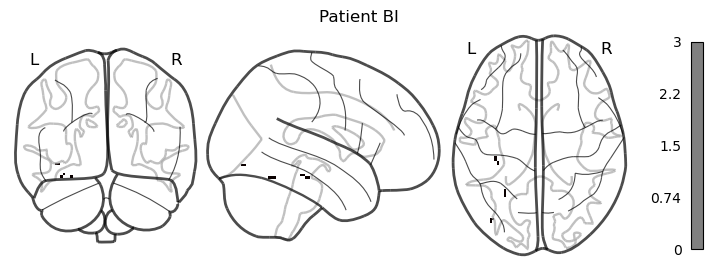

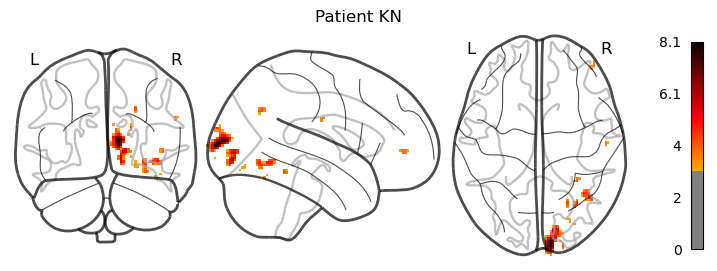

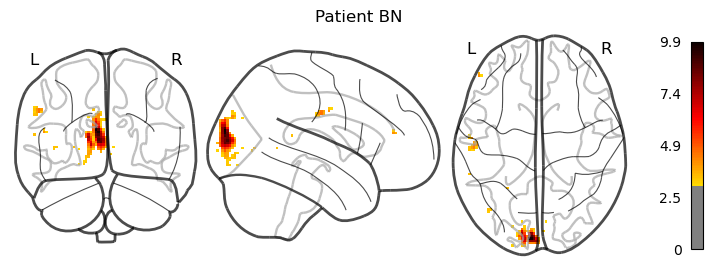

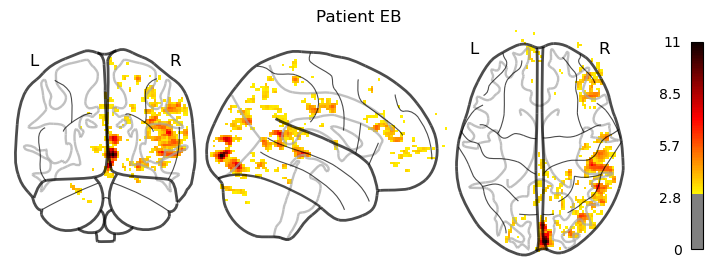

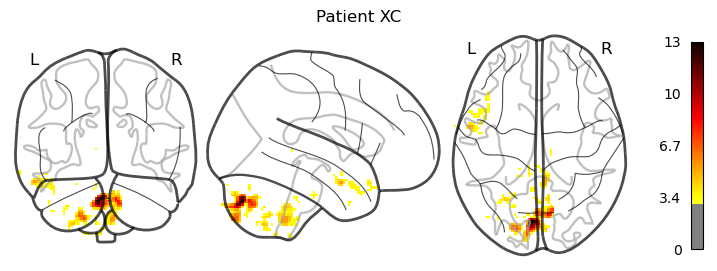

In [26]:
for task,cond, cope in zip(task_info['task'], task_info['cond'],task_info['cope']):
    os.makedirs(f'{fig_dir}/glass_brain/{cond}', exist_ok=True)
    for sub, code, hemi in zip(sub_info['sub'], sub_info['code'], sub_info['intact_hemi']):
        sub_dir = f'{data_dir}/{sub}/ses-01'
    
        
        #register each highlevel to anat
        zstat_path = f'{sub_dir}/derivatives/fsl/{task}/HighLevel.gfeat/cope{cope}.feat/stats/zstat1_reg.nii.gz'

        #check if zstat exists
        if os.path.exists(zstat_path):
            #load zstat
            zstat = image.load_img(zstat_path)
            #zstat = image.clean_img(zstat,mask_img=mni)
            #create figure

            fig, ax = plt.subplots(figsize=(9, 3))

            display = plotting.plot_glass_brain(zstat, axes=ax,threshold = 3.1, draw_cross = False, colorbar = True)
            ax.title.set_text(f'Patient {code}')
            

            display.savefig(f'{fig_dir}/glass_brain/{cond}/{code}_{hemi}_{cond}.png') 
            plt.show()
            plt.pause(0.0001)

              

In [ ]:
# create a figure with multiple axes to plot each anatomical image
def plot_glass_brain(subs, exp):
    fig, axes = plt.subplots(nrows=len(all_subs), ncols=1, figsize=(9, 25))


    # axes is a 2 dimensional numpy array
    for axn, ax in enumerate(axes.flatten()):
        display = plotting.plot_glass_brain(all_subs[axn], axes=ax, threshold = 3.1, draw_cross = False, colorbar = True)

        ax.title.set_text(f'Subject {axn + 1}')

    plt.show()
    display.savefig(f'{fig_dir}/{exp}_glassbrain.png')   
    plt.pause(0.0001)

    # save the output figure with all the anatomical images
    #fig.savefig("my_test_img.png")